# Projeto: Análise Estatística de Braço Robótico Planar (2R)

Este notebook investiga a distribuição de probabilidade da posição da garra de um braço robótico planar (2R). O objetivo é comparar a **solução analítica** (teórica) da densidade de probabilidade $f_{X,Y}(x, y)$ com uma **simulação computacional**.

O projeto demonstra como uma distribuição de entrada uniforme (nos ângulos das juntas, $\theta_1, \theta_2$) se transforma em uma distribuição de saída altamente não-uniforme no espaço de trabalho $(X, Y)$ devido à cinemática não-linear do robô.

## 1. Modelo Teórico e Cálculo Analítico


### 1.1. Modelo do Robô

* **Variáveis de Entrada:** Assumimos que os ângulos $\Theta_1$ e $\Theta_2$ são variáveis aleatórias **independentes** e **uniformemente distribuídas** no intervalo $[-\pi, \pi]$.
    * $f_{\Theta}(\theta_1, \theta_2) = \frac{1}{\text{Área}} = \frac{1}{(2\pi) \cdot (2\pi)} = \frac{1}{4\pi^2}$
* **Funções de Transformação (Cinemática Direta):**
    * $X = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)$
    * $Y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2)$

### 1.2. Densidade Conjunta Analítica $f_{X,Y}(x, y)$

Para encontrar a nova PDF, $f_{X,Y}(x, y)$, usamos a fórmula de transformação de variáveis, que depende do **Determinante Jacobiano (J)** da transformação.



### 1.3. Detalhe do Cálculo do Determinante Jacobiano (J)

O Jacobiano é uma ferramenta fundamental na transformação de variáveis aleatórias. Ele mede como a área no espaço de entrada $(\theta_1, \theta_2)$ é "esticada" ou "comprimida" ao ser mapeada para o espaço de saída $(X, Y)$.

O determinante Jacobiano ($J$) é definido como:

$$J = \det \begin{pmatrix} \frac{\partial X}{\partial \theta_1} & \frac{\partial X}{\partial \theta_2} \\ \frac{\partial Y}{\partial \theta_1} & \frac{\partial Y}{\partial \theta_2} \end{pmatrix} = \left( \frac{\partial X}{\partial \theta_1} \cdot \frac{\partial Y}{\partial \theta_2} \right) - \left( \frac{\partial X}{\partial \theta_2} \cdot \frac{\partial Y}{\partial \theta_1} \right)$$


#### 1. Cálculo das Derivadas Parciais

Primeiro, calculamos cada um dos quatro componentes da matriz Jacobiana, usando a regra da cadeia.

**a) Derivadas em relação a $\theta_1$:**
* $\frac{\partial X}{\partial \theta_1} = -L_1 \sin(\theta_1) - L_2 \sin(\theta_1 + \theta_2)$
* $\frac{\partial Y}{\partial \theta_1} = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)$

**b) Derivadas em relação a $\theta_2$:**
* $\frac{\partial X}{\partial \theta_2} = 0 - L_2 \sin(\theta_1 + \theta_2) = -L_2 \sin(\theta_1 + \theta_2)$
* $\frac{\partial Y}{\partial \theta_2} = 0 + L_2 \cos(\theta_1 + \theta_2) = L_2 \cos(\theta_1 + \theta_2)$

#### 2. Substituição no Determinante

Agora, substituímos essas quatro derivadas na fórmula do determinante $J = (a \cdot d) - (b \cdot c)$:

* $a = \frac{\partial X}{\partial \theta_1} = -L_1 \sin(\theta_1) - L_2 \sin(\theta_1 + \theta_2)$
* $b = \frac{\partial X}{\partial \theta_2} = -L_2 \sin(\theta_1 + \theta_2)$
* $c = \frac{\partial Y}{\partial \theta_1} = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)$
* $d = \frac{\partial Y}{\partial \theta_2} = L_2 \cos(\theta_1 + \theta_2)$

$$J = \underbrace{\left( -L_1 \sin(\theta_1) - L_2 \sin(\theta_1 + \theta_2) \right)}_{a} \cdot \underbrace{\left( L_2 \cos(\theta_1 + \theta_2) \right)}_{d} - \underbrace{\left( -L_2 \sin(\theta_1 + \theta_2) \right)}_{b} \cdot \underbrace{\left( L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) \right)}_{c}$$

#### 3. Expansão e Simplificação

**Passo 1: Expandir os termos.**

* **Termo (a $\cdot$ d):**
    $= \left( -L_1 \sin(\theta_1) \right) \cdot \left( L_2 \cos(\theta_1 + \theta_2) \right) + \left( -L_2 \sin(\theta_1 + \theta_2) \right) \cdot \left( L_2 \cos(\theta_1 + \theta_2) \right)$
    $= -L_1 L_2 \sin(\theta_1) \cos(\theta_1 + \theta_2) - L_2^2 \sin(\theta_1 + \theta_2) \cos(\theta_1 + \theta_2)$

* **Termo (b $\cdot$ c):**
    $= \left( -L_2 \sin(\theta_1 + \theta_2) \right) \cdot \left( L_1 \cos(\theta_1) \right) + \left( -L_2 \sin(\theta_1 + \theta_2) \right) \cdot \left( L_2 \cos(\theta_1 + \theta_2) \right)$
    $= -L_1 L_2 \sin(\theta_1 + \theta_2) \cos(\theta_1) - L_2^2 \sin(\theta_1 + \theta_2) \cos(\theta_1 + \theta_2)$

**Passo 2: Subtrair $(b \cdot c)$ de $(a \cdot d)$.**

$$J = (a \cdot d) - (b \cdot c)$$

$$J = \left[ -L_1 L_2 \sin(\theta_1) \cos(\theta_1 + \theta_2) - L_2^2 \sin(\theta_1 + \theta_2) \cos(\theta_1 + \theta_2) \right] - \left[ -L_1 L_2 \sin(\theta_1 + \theta_2) \cos(\theta_1) - L_2^2 \sin(\theta_1 + \theta_2) \cos(\theta_1 + \theta_2) \right]$$

**Passo 3: Distribuir o sinal negativo e cancelar termos.**

Note que o termo $- L_2^2 \sin(\theta_1 + \theta_2) \cos(\theta_1 + \theta_2)$ aparece em ambos os lados da subtração, então ele será cancelado.

$$J = -L_1 L_2 \sin(\theta_1) \cos(\theta_1 + \theta_2) \cancel{- L_2^2 \sin(\dots)\cos(\dots)} + L_1 L_2 \sin(\theta_1 + \theta_2) \cos(\theta_1) \cancel{+ L_2^2 \sin(\dots)\cos(\dots)}$$

**Passo 4: Reorganizar os termos restantes.**

$$J = L_1 L_2 \sin(\theta_1 + \theta_2) \cos(\theta_1) - L_1 L_2 \sin(\theta_1) \cos(\theta_1 + \theta_2)$$

**Passo 5: Fatorar $L_1 L_2$ e aplicar a identidade trigonométrica.**

$$J = L_1 L_2 \left[ \sin(\theta_1 + \theta_2) \cos(\theta_1) - \cos(\theta_1 + \theta_2) \sin(\theta_1) \right]$$

Usamos a identidade da **diferença de ângulos para o seno**:
$\sin(A - B) = \sin(A) \cos(B) - \cos(A) \sin(B)$

Onde $A = (\theta_1 + \theta_2)$ e $B = \theta_1$.

$$J = L_1 L_2 \left[ \sin( (\theta_1 + \theta_2) - \theta_1 ) \right]$$
$$J = L_1 L_2 \sin(\theta_2)$$

#### 5. Resultado Final

O determinante Jacobiano da transformação é:

$$J = L_1 L_2 \sin(\theta_2)$$

Isso revela que o Jacobiano depende **apenas** do ângulo relativo $\theta_2$. Ele se torna zero (indicando uma singularidade) quando $\sin(\theta_2) = 0$, ou seja, quando :

* $\theta_2 = 0$ (braço esticado) ou 
* $\theta_2 = \pi$ (braço dobrado).

## 2. **Resultado Analítico:**

A fórmula final da densidade, que considera as duas soluções da cinemática inversa (cotovelo para cima/baixo), é:

$$f_{X,Y}(x, y) = \frac{f_{\Theta}(\text{sol 1})}{|J(\text{sol 1})|} + \frac{f_{\Theta}(\text{sol 2})}{|J(\text{sol 2})|} = \frac{2 \cdot (1/4\pi^2)}{|L_1 L_2 \sin(\theta_2)|}$$

Usando a lei dos cossenos ($r^2 = L_1^2 + L_2^2 + 2L_1L_2\cos(\theta_2)$) para substituir $\sin(\theta_2)$ por uma expressão em $(x, y)$, chegamos à solução analítica:

> $$f_{X,Y}(x, y) = \frac{1}{2\pi^2 L_1 L_2 \sqrt{1 - \left(\frac{x^2 + y^2 - L_1^2 - L_2^2}{2 L_1 L_2}\right)^2}}$$

## 3. A "Surpresa" Teórica (Singularidades)

A fórmula analítica nos mostra que a densidade $f_{X,Y}(x, y)$ tende ao **infinito** quando o denominador (o termo com a raiz quadrada) vai a zero.

Isso acontece exatamente em duas condições:
1.  **Anel Externo ($r = L_1 + L_2$):** Onde $\theta_2 = 0$ (braço esticado).
2.  **Anel Interno ($r = |L_1 - L_2|$):** Onde $\theta_2 = \pi$ (braço dobrado).

A simulação (scatter plot) a seguir deve emular visualmente este resultado, mostrando uma concentração massiva de pontos nesses anéis.

# 4. Configuração da Simulação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

%matplotlib inline

# --- Configurações Globais da Simulação ---
N = 1000000      # Número total de amostras a gerar
N_SCATTER = 50000  # Número de amostras para *plotar* (plotar 1M é lento)

print("Bibliotecas importadas e parâmetros definidos.")

Bibliotecas importadas e parâmetros definidos.


# 5. Funções Auxiliares

In [ ]:
def calcular_posicao(L1, L2, theta1, theta2):
    """Calcula as posições X e Y usando cinemática direta."""
    X = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    Y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return X, Y

def plotar_scatter(X, Y, L1, L2, sufixo, n_plot):
    """
    Seleciona uma amostra de n_plot pontos e gera um scatter plot
    para emular a densidade de probabilidade.
    Salva a figura e a exibe.
    """
    
    # 1. Selecionar uma amostra aleatória para plotar
    indices = np.random.choice(len(X), n_plot, replace=False)
    X_sample = X[indices]
    Y_sample = Y[indices]
    
    # 2. Plotar
    print(f"\nPlotando Scatter Plot para L1={L1}, L2={L2}...")
    plt.figure(figsize=(10, 8))
    plt.scatter(
        X_sample, 
        Y_sample, 
        s=0.1,      # Tamanho do ponto (bem pequeno)
        alpha=0.1   # Transparência (para ver a densidade)
    )

    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.title(f'Scatter Plot (X, Y) - L1={L1}, L2={L2} ({n_plot} amostras)')
    plt.axis('equal')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # 3. Salvar e Mostrar
    plt.show()

print("Funções 'calcular_posicao' e 'plotar_scatter' definidas.")

Funções 'calcular_posicao' e 'plotar_scatter' definidas.


# 6. Gerando dados de entrada

In [10]:
## 2. Geração dos Dados da Simulação

print(f"Gerando {N} amostras de ângulos independentes...")

# Gerar theta1 e theta2 de uma distribuição uniforme entre -pi e pi
# Esta amostragem INDEPENDENTE corresponde à premissa do cálculo
# analítico (f_theta = 1 / 4pi^2).
theta1 = np.random.uniform(-np.pi, np.pi, N)
theta2 = np.random.uniform(-np.pi, np.pi, N)

print("Amostras de ângulos (theta1, theta2) geradas com sucesso.")
print(f"Shape de theta1: {theta1.shape}")

Gerando 1000000 amostras de ângulos independentes...
Amostras de ângulos (theta1, theta2) geradas com sucesso.
Shape de theta1: (1000000,)


## 7. Resultados da Simulação

Agora, aplicamos as funções de transformação aos dados gerados e plotamos os resultados.

### Cenário 1: Braços Iguais ($L_1 = 1.0, L_2 = 1.0$)
-   $R_{max} = L_1 + L_2 = 2.0$
-   $R_{min} = |L_1 - L_2| = 0.0$
-   **Previsão Teórica:** A densidade deve ser infinita no **anel externo (raio 2.0)** e no **ponto central (0,0)**.


Plotando Scatter Plot para L1=1.0, L2=1.0...
Gráfico salvo em: scatter_plot_L1_1_L2_1.png


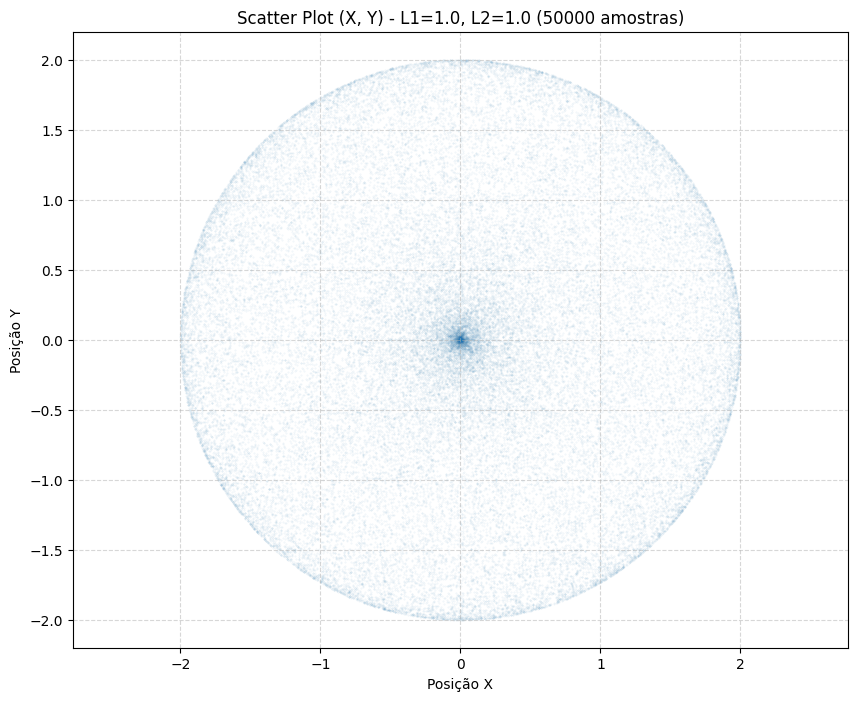

In [ ]:
# Definir comprimentos
L1_1 = 1.0
L2_1 = 1.0

# Calcular posições
X1, Y1 = calcular_posicao(L1_1, L2_1, theta1, theta2)

plotar_scatter(X1, Y1, L1_1, L2_1, "L1_1_L2_1", N_SCATTER)

### Cenário 2: Braços Diferentes ($L_1 = 1.0, L_2 = 0.5$)
-   $R_{max} = L_1 + L_2 = 1.5$
-   $R_{min} = |L_1 - L_2| = 0.5$
-   **Previsão Teórica:** A densidade deve ser infinita no **anel externo (raio 1.5)** e no **anel interno (raio 0.5)**.


Plotando Scatter Plot para L1=1.0, L2=0.5...
Gráfico salvo em: scatter_plot_L1_1_L2_0_5.png


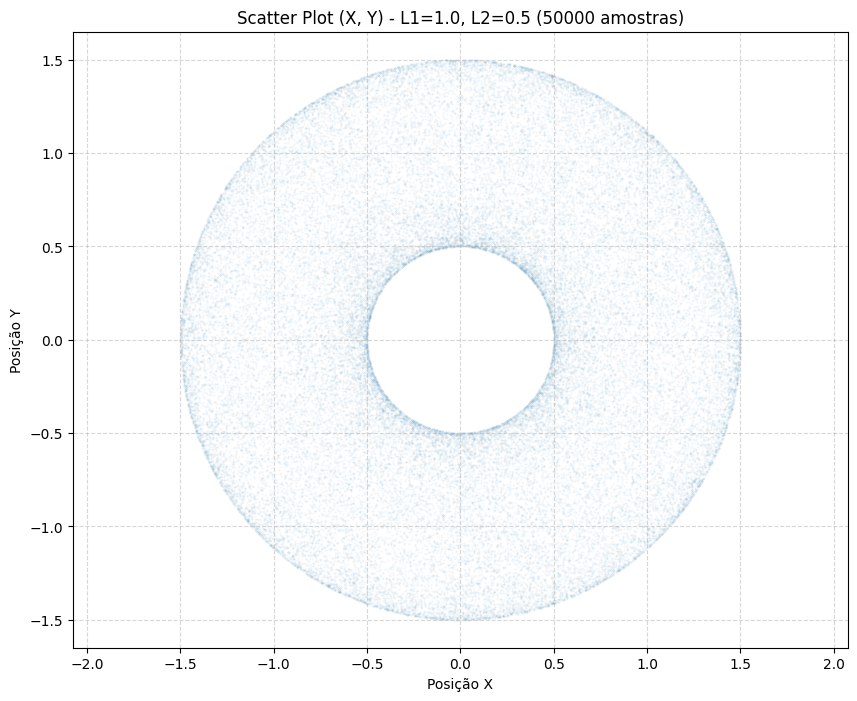

In [12]:
# Definir comprimentos
L1_2 = 1.0
L2_2 = 0.5

# Calcular posições (usando os mesmos ângulos de entrada)
X2, Y2 = calcular_posicao(L1_2, L2_2, theta1, theta2)

# Plotar o scatter plot
plotar_scatter(X2, Y2, L1_2, L2_2, "L1_1_L2_0_5", N_SCATTER)

## 4. Conclusão: Verificação Visual

Como podemos observar nos *scatter plots* acima, os resultados da simulação estão perfeitamente de acordo com a solução analítica.

1.  **Cenário 1 ($L_1=L_2$):** O gráfico de dispersão mostra uma concentração extrema de pontos (alta densidade) no centro (0,0) e ao longo do círculo externo (raio 2.0).
2.  **Cenário 2 ($L_1 \neq L_2$):** O gráfico mostra um "buraco" no meio, com pontos se concentrando massivamente no círculo interno (raio 0.5) e no círculo externo (raio 1.5).

Ambos os casos confirmam visualmente que a densidade de probabilidade da garra é ditada pelas singularidades do robô (onde $J=0$), exatamente como a fórmula analítica $f_{X,Y}(x, y)$ previu.